In [68]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm.auto import tqdm
from matplotlib.path import Path
import ast
import pickle
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import networkx as nx
from collections import Counter

# Analysis

In [2]:
l = {}
threshold = [1,2,3,4,5,10,15,20,50,100,200]


for t in threshold:
    count = 0 
#    fh=open('output/network_france_germany.csv','r')
    fh=open('output/network_random_arts.csv','r')

    for line in fh.readlines():
        s=line.strip().split(',')
        if int(s[2]) > t:
            count = count + 1
    l[t] = count
l

{1: 859300,
 2: 474220,
 3: 309404,
 4: 219839,
 5: 165041,
 10: 59481,
 15: 30338,
 20: 18473,
 50: 2876,
 100: 268,
 200: 9}

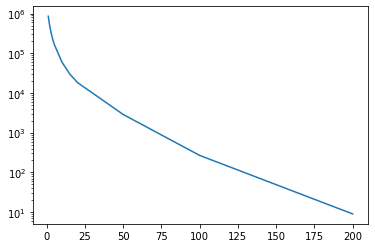

In [3]:
plt.semilogy(l.keys(),l.values())

In [8]:
def load_graph(MIN_TILES):
    G=nx.Graph()
    fh=open('output/network_random_arts.csv','r')
    #fh=open('network_france_germany.csv','r')


    for line in fh.readlines():
        s=line.strip().split(',')
        if int(s[2]) >= MIN_TILES :
            G.add_edge(str(s[0]),int(s[1]),weight = int(s[2]))
    fh.close()  
    return G

In [9]:
def max_min_tiles(guess):
    # trova il massimo numero minimo di tiles messe da un utente per cui abbiamo una componente sola!
    G = load_graph(guess)
    n_comps = len([c for c in nx.connected_components(G)])
    MIN_TILES = guess
    while n_comps > 1 :
        G  = load_graph(MIN_TILES)
        n_comps = len([c for c in nx.connected_components(G)])        
        MIN_TILES = MIN_TILES -  1

    return G, MIN_TILES

In [10]:
G,MIN_TILES = max_min_tiles(25)
MIN_TILES

19

In [105]:
MIN_TILES = 50

In [106]:
import random
G=nx.Graph()
#fh=open('output/network_france_germany.csv','r')
fh=open('output/network_random_arts.csv','r')


for line in fh.readlines():
    s=line.strip().split(',')
    if int(s[2]) > MIN_TILES:
        if random.random() < 1:
            G.add_edge(str(s[0]), int(s[1]), weight = int(s[2]))
fh.close()  

In [107]:
len(G.nodes)

2895

In [108]:
counter = 0
for node in G.nodes:
    if isinstance(node, str):
        counter += 1
counter
print('abbiamo ',counter,' artworks e ', len(G.nodes) - counter, ' utenti' )

abbiamo  25  artworks e  2870  utenti


In [109]:
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[686,
 406,
 351,
 304,
 243,
 186,
 130,
 120,
 98,
 76,
 53,
 45,
 40,
 36,
 24,
 20,
 20,
 17,
 14,
 12,
 11,
 3]

In [113]:
if len([len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]) > 1:
    S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
G = nx.Graph(S[0])

### projected graph for arts

In [103]:
#from networkx.algorithms import bipartite 
#G = bipartite.gnmk_random_graph(10,20,100)

In [114]:
arts = nx.bipartite.sets(G)[0]
users = nx.bipartite.sets(G)[1]
len(arts), len(users)

(13, 1)

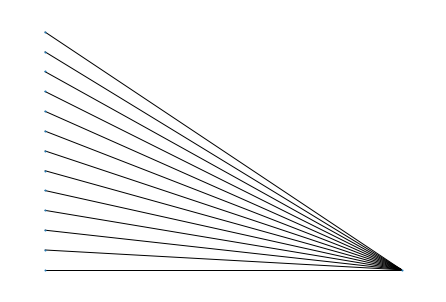

In [115]:
pos = nx.bipartite_layout(G, arts)
nx.draw(G,pos,node_size=1)
plt.savefig('plot/bipartite_net.png',dpi = 300,backend = 'cairo')

In [46]:
B = nx.Graph()
B.add_edges_from([("a", 1), ("b", 1), ("a", 2), ("b", 2)])
G = bipartite.projected_graph(B, ["a", "b"], multigraph=True)
print([sorted((u, v)) for u, v in G.edges()])
nodes = nx.bipartite.sets(B)[0]


[['a', 'b'], ['a', 'b']]


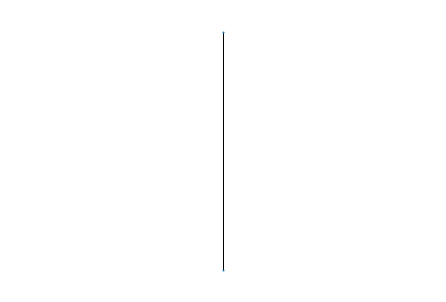

In [48]:
pos = nx.bipartite_layout(B,nodes)
nx.draw(G,pos,node_size=1)


In [116]:
A = bipartite.projected_graph(G,arts, multigraph=False)

In [82]:
A = bipartite.collaboration_weighted_projected_graph(G,arts)

In [117]:
U = bipartite.projected_graph(G,users, multigraph=False)

In [118]:
len(A.edges), len(U.edges)

(78, 0)

In [119]:
#pos = nx.circular_layout(A)
#pos = nx.kamada_kawai_layout(A)
pos = nx.spring_layout(A)

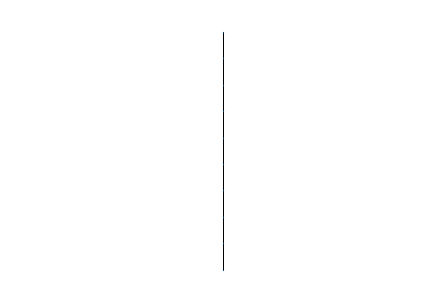

In [84]:
nx.draw(A,pos,node_size=0.1)
#plt.savefig('plot/project_net_arts.png',dpi = 300,backend = 'cairo')
plt.savefig('plot/project_net_arts.png',dpi = 300)

In [64]:
pos = nx.circular_layout(U)
#pos = nx.kamada_kawai_layout(U)
#pos = nx.spring_layout(U)

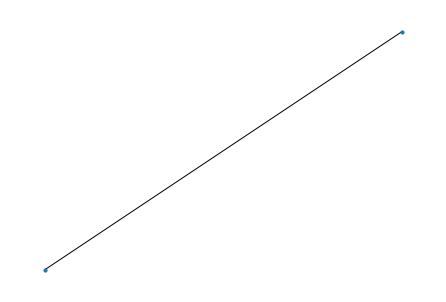

In [65]:
nx.draw(U,pos,node_size=10)
plt.savefig('plot/project_net_arts.png',dpi = 300,backend = 'cairo')

# analisi del network

### density

In [54]:
def density(G):
    return 2* G.number_of_edges()/(G.number_of_nodes() * (G.number_of_nodes() - 1))
density(A), density(U)

(0.13725490196078433, 0.20838921315062256)

### distribuzione di grado

Counter({1: 7, 2: 4, 3: 4, 5: 1, 4: 1, 6: 1})


(1.0, 10000.0, 1e-05, 1.0)

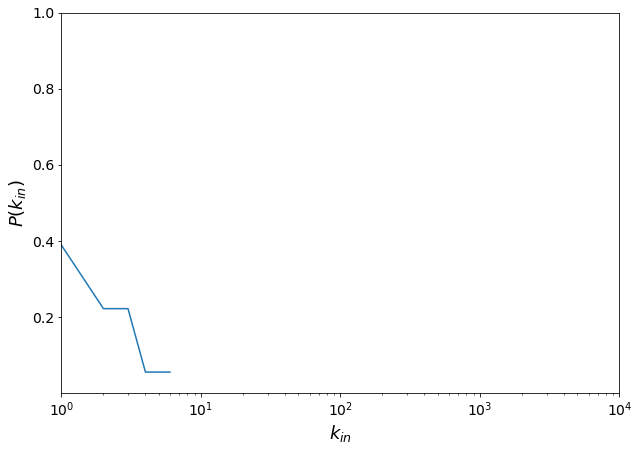

In [55]:
from collections import Counter 
import matplotlib.pyplot as plt

indeg=dict(A.degree()).values()
degin_distri=Counter(indeg)
print(degin_distri)


x=[]
y=[]

for i in sorted(degin_distri):   
    x.append(i)
    y.append(degin_distri[i]/len(A))

plt.figure(figsize=(10,7))    
plt.plot(x,y)

plt.xlabel('$k_{in}$', fontsize=18)
plt.ylabel('$P(k_{in})$', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.yscale('linear')
plt.xscale('log')
plt.axis([1,10000,0.00001,1.0])

In [ ]:
### clustering

In [ ]:
### 